# 作業

實作各種不一樣的方式來調整飽和 / 對比 / 明亮

1. 改變 color space 來調整飽和度
2. 實作直方圖均衡
3. alpha/ beta 調整對比 / 明亮

In [1]:
from google.colab import files
uploaded = files.upload()

Saving lena.png to lena.png


In [0]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img_path = 'lena.png'

# 以彩色圖片的方式載入
img = cv2.imread(img_path, cv2.IMREAD_COLOR)

## 改變飽和度

- 轉換成 HSV color space, 改變 s channel 的值

In [6]:
#了解一下[..., -1]的用法為何

img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

img_hsv[..., -1] 

array([[226, 226, 223, ..., 230, 221, 200],
       [226, 226, 223, ..., 230, 221, 200],
       [226, 226, 223, ..., 230, 221, 200],
       ...,
       [ 84,  84,  92, ..., 173, 172, 177],
       [ 82,  82,  96, ..., 179, 181, 185],
       [ 82,  82,  96, ..., 179, 181, 185]], dtype=uint8)

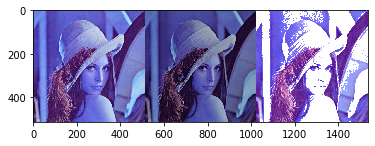

In [22]:
# 為了要改變飽和度，我們先把 color space 轉成 HSV 格式
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
change_percentage = 0.2

# 針對飽和度的值做改變，超過界線 0~1 的都會 bound
# 在 HSV color space 減少飽和度
img_hsv_down = img_hsv.astype('float32')
img_hsv_down[..., -1] = img_hsv_down[..., -1] / 255 - change_percentage
img_hsv_down[img_hsv_down[...,-1] < 0] = 0
img_hsv_down[..., -1] = img_hsv_down[..., -1]*255
img_hsv_down = img_hsv_down.astype('uint8')

# 在 HSV color space 增加飽和度
img_hsv_up = img_hsv.astype('float32')
img_hsv_up[..., -1] = img_hsv_up[..., -1] / 255 + change_percentage
img_hsv_up[img_hsv_up[...,-1] > 1] = 1
img_hsv_up[..., -1] = img_hsv_up[..., -1]*255
img_hsv_up = img_hsv_up.astype('uint8')

# 轉換 color space 回 BGR
img_hsv_down = cv2.cvtColor(img_hsv_down, cv2.COLOR_HSV2BGR)
img_hsv_up = cv2.cvtColor(img_hsv_up, cv2.COLOR_HSV2BGR)

# 組合圖片 + 顯示圖片
img_hsv_change = np.hstack((img, img_hsv_down, img_hsv_up))
    
#on colab notebook
plt.imshow(img_hsv_change)
    

## 直方圖均衡

1. case 1: 把彩圖拆開對每個 channel 個別做直方圖均衡再組合起來
2. case 2: 轉換 color space 到 HSV 之後對其中一個 channel 做直方圖均衡

In [30]:
#Try
equalHist_by_channel = cv2.equalizeHist(img[:,:,0])
equalHist_by_channel

array([[194, 194, 208, ..., 185, 153, 100],
       [194, 194, 208, ..., 185, 153, 100],
       [194, 194, 208, ..., 185, 153, 100],
       ...,
       [ 13,  13,   8, ...,  82,  59,  68],
       [  7,   7,  18, ...,  68,  74,  74],
       [  7,   7,  18, ...,  68,  74,  74]], dtype=uint8)

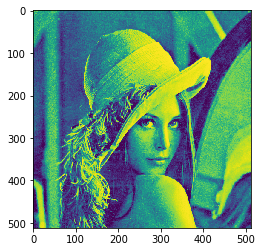

In [31]:
plt.imshow(equalHist_by_channel)

In [45]:
# case 1
# 每個 channel 個別做直方圖均衡
#equalHist_by_channel = cv2.equalizeHist(img[0])

img_bgr_equal = img.copy()
# 組合經過直方圖均衡的每個 channel
for channel in range(3):
  img_bgr_equal[:,:, channel] = cv2.equalizeHist(img[:,:, channel])

# case 2 - 轉換 color space 後只對其中一個 channel 做直方圖均衡
#img_hsv_equal = cv2.equalizeHist(cv2.cvtColor(img, cv2.COLOR_BGR2HSV).astype('uint8'))

#case 2 暫時跳過


# 組合圖片 + 顯示圖片
img_bgr_equalHist = np.hstack((img, img_bgr_equal, img_hsv_equal))

# 比較 (原圖, BGR color space 對每個 channel 做直方圖均衡, HSV color space 對明度做直方圖均衡)
plt.imshow(img_bgr_equalHist)

error: ignored

In [42]:
type(cv2.cvtColor(img, cv2.COLOR_BGR2HSV)[..., 0])

numpy.ndarray

## 調整對比 / 明亮

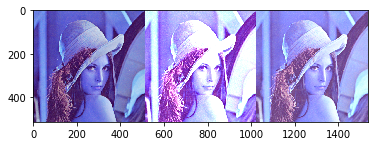

In [24]:
# alpha: 控制對比度 (1.0~3.0)
# beta: 控制明亮度 (0~255)
add_contrast = cv2.convertScaleAbs(img, alpha=2.0, beta=0)
add_lighness = cv2.convertScaleAbs(img, alpha=1.0, beta=50)


# 組合圖片 + 顯示圖片
img_contrast_light = np.hstack((img, add_contrast, add_lighness))
plt.imshow(img_contrast_light)